In [9]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

              mean  variance       std
gene                                  
Acta2    -0.013174  0.711543  0.843530
Adamtsl2 -0.008687  0.807990  0.898882
Adgre1   -0.003641  0.887707  0.942182
Adgrg6   -0.010040  0.724247  0.851027
Atp6v0d2 -0.004666  0.737323  0.858675
...            ...       ...       ...
Vwf      -0.004971  0.926039  0.962309
Wnt2     -0.004918  0.814758  0.902640
Wnt9b    -0.020738  0.385461  0.620855
Wt1      -0.019533  0.266815  0.516541
Xcr1     -0.018143  0.333090  0.577140

[99 rows x 3 columns]


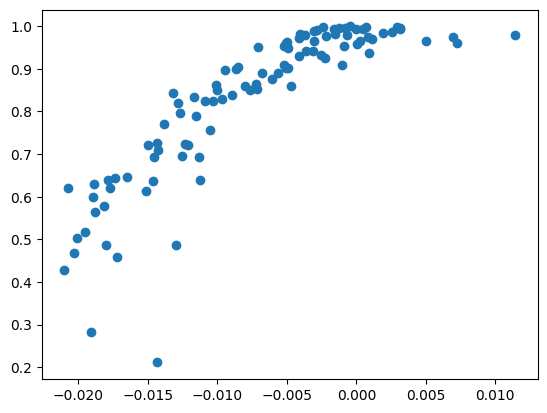

In [3]:
sdata.table.to_df()
# calculate average per column
avg = sdata.table.to_df().mean(axis=0)
# calculate variance per column
var = sdata.table.to_df().var(axis=0)
# calculate std per column
std = sdata.table.to_df().std(axis=0)
# make dataframe with columns avg and var
pd_stats = pd.DataFrame({'mean': avg, 'variance': var, 'std': std})
print(pd_stats)
# plot mean vs variance
plt.scatter(pd_stats['mean'], pd_stats['std'])

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
path_marker_genes = path_mg,
marker_genes = pd.read_csv(path_marker_genes[0], sep=',',index_col=0)
scores_cell_celltype = pd.DataFrame()
cell_types = marker_genes.columns.tolist()
matrix = sdata.table.to_df()
# Divide the expression of each gene by its std
# divide each column of matrix by std of that column
matrix = matrix.div(matrix.std(axis=0))
all_mean_expression = sdata.table.to_df().mean(axis=0)


In [5]:

for cell_type in cell_types:
    scores_cells = []
    for i in range(matrix.shape[0]):
        score = 0 
        for gene in marker_genes[marker_genes[cell_type] == 1].index.tolist():
            score = score + (matrix[gene][i] - all_mean_expression[gene])
        scores_cells.append(score)
    scores_cell_celltype[cell_type] = scores_cells
scores_cell_celltype 


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.861580,-3.153429,-0.535184,0.382180,-2.133089,-4.245910,-3.314634,-0.504064,-0.483616
1,-4.979719,-0.596915,-1.827885,-3.414234,30.353657,-5.605609,25.855924,-0.504064,23.139886
2,-5.072871,-3.153429,-1.827885,-2.729599,-2.132549,-4.704757,40.810118,-0.504064,40.807220
3,-3.231192,-3.153429,-1.827885,-1.851334,-4.061868,-4.645351,17.699311,-0.504064,13.802720
4,-2.301914,-3.153429,-1.827885,-0.436926,-4.061868,-2.847748,-3.132565,-0.504064,-0.483616
...,...,...,...,...,...,...,...,...,...
11223,-0.235959,-3.153429,-1.827885,-0.865403,-4.061868,-2.559206,-3.329815,-0.504064,-0.483616
11224,5.060093,-3.153429,-1.827885,0.069933,0.580741,-1.913876,-2.498120,-0.504064,-0.483616
11225,0.858042,-3.153429,-1.827885,-0.896138,0.618578,-5.159681,-4.228405,-0.504064,-0.483616
11226,-7.600524,-3.153429,-1.827885,-2.956632,1.597105,29.493776,18.377426,-0.504064,-0.483616


In [6]:
# min max scale scores per cell type to make them more comparable between cell types 
scores_cell_celltype_norm = scores_cell_celltype.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
scores_cell_celltype_norm

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.536893,0.000000,0.018476,0.068247,0.020264,0.032274,0.015266,0.0,0.000000
1,0.132184,0.045767,0.000000,0.000000,0.361570,0.009912,0.242203,0.0,0.392005
2,0.128706,0.000000,0.000000,0.012307,0.020269,0.024728,0.358542,0.0,0.685175
3,0.197457,0.000000,0.000000,0.028096,0.000000,0.025705,0.178748,0.0,0.237066
4,0.232147,0.000000,0.000000,0.053522,0.000000,0.055269,0.016683,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.309270,0.000000,0.000000,0.045819,0.000000,0.060015,0.015148,0.0,0.000000
11224,0.506973,0.000000,0.000000,0.062634,0.048775,0.070629,0.021619,0.0,0.000000
11225,0.350109,0.000000,0.000000,0.045267,0.049173,0.017246,0.008158,0.0,0.000000
11226,0.034348,0.000000,0.000000,0.008226,0.059453,0.587182,0.184023,0.0,0.000000


In [7]:
# cell is annotated with the cell type with the highest score
sc_cell_cellt = scores_cell_celltype_norm.idxmax(axis=1).to_dict()
# all indices of scores_cell_celltype with max value of row < 0
unknown_cells = scores_cell_celltype_norm[scores_cell_celltype_norm.max(axis=1) < 0].index.tolist()
print(len(unknown_cells))
# change the values of keys in list
for i in unknown_cells:
    sc_cell_cellt[i] = 'unknown'

0


In [8]:
sc_cell_cellt = {str(k): v for k, v in sc_cell_cellt.items()}
sdata.table.obs["annotation_own_score_genes"] = sc_cell_cellt.values()
# cleanliness of each annotation is calculated
max_scores = scores_cell_celltype_norm.max(axis=1)
second_scores = scores_cell_celltype_norm.apply(lambda x: x.nlargest(2).values[-1], axis=1)
cleanliness = (max_scores - second_scores) / ((max_scores + second_scores) / 2)
sc_cell_cleanl = cleanliness.to_dict()
for i in unknown_cells:
    sc_cell_cleanl[i] = 0
sc_cell_cleanl = {str(k): v for k, v in sc_cell_cleanl.items()}
sdata.table.obs["cleanliness_own_score_genes"] = sc_cell_cleanl.values()